In [1]:
import pandas as pd
df = pd.read_pickle(filepath_or_buffer='data/churndata.pkl')
df.head()

,id,months,offer,phone,multiple,internet_type,gb_mon,security,backup,protection,...,unlimited,contract,paperless,payment,monthly,total_revenue,satisfaction,churn_value,churn_score,cltv
0,8779-QRDMV,1,None,No,No,DSL,8,No,No,Yes,...,No,Month-to-Month,Yes,Bank Withdrawal,39.65,59.65,3,1,91,5433
1,7495-OOKFY,8,Offer E,Yes,Yes,Fiber Optic,17,No,Yes,No,...,Yes,Month-to-Month,Yes,Credit Card,80.65,1024.10,3,1,69,5302
2,1658-BYGOY,18,Offer D,Yes,Yes,Fiber Optic,52,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,1910.88,2,1,81,3179
3,4598-XLKNJ,25,Offer C,Yes,No,Fiber Optic,12,No,Yes,Yes,...,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2995.07,2,1,88,5337
4,4846-WHAFZ,37,Offer C,Yes,Yes,Fiber Optic,14,No,No,No,...,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,3102.36,2,1,67,2793


In [2]:
df.shape

(7043, 21)

In [3]:
df.drop(
    columns = ['id', 'phone', 'total_revenue', 'cltv'],
    index = 1,
    inplace = True
)

df.head()

,months,offer,multiple,internet_type,gb_mon,security,backup,protection,support,unlimited,contract,paperless,payment,monthly,satisfaction,churn_value,churn_score
0,1,None,No,DSL,8,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,39.65,3,1,91
2,18,Offer D,Yes,Fiber Optic,52,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,95.45,2,1,81
3,25,Offer C,No,Fiber Optic,12,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.50,2,1,88
4,37,Offer C,Yes,Fiber Optic,14,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,76.50,2,1,67
5,27,Offer C,Yes,Fiber Optic,18,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,78.05,1,1,95


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7042 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   months         7042 non-null   int64  
 1   offer          7042 non-null   object 
 2   multiple       7042 non-null   object 
 3   internet_type  7042 non-null   object 
 4   gb_mon         7042 non-null   int64  
 5   security       7042 non-null   object 
 6   backup         7042 non-null   object 
 7   protection     7042 non-null   object 
 8   support        7042 non-null   object 
 9   unlimited      7042 non-null   object 
 10  contract       7042 non-null   object 
 11  paperless      7042 non-null   object 
 12  payment        7042 non-null   object 
 13  monthly        7042 non-null   float64
 14  satisfaction   7042 non-null   int64  
 15  churn_value    7042 non-null   int64  
 16  churn_score    7042 non-null   int64  
dtypes: float64(1), int64(5), object(11)
memory usage: 990.3+ 

In [5]:
round(df.describe(), 2)

,months,gb_mon,monthly,satisfaction,churn_value,churn_score
count,7042.00,7042.00,7042.00,7042.00,7042.00,7042.00
mean,32.39,20.52,64.76,3.24,0.27,58.50
std,24.54,20.42,30.09,1.20,0.44,21.17
min,1.00,0.00,18.25,1.00,0.00,5.00
25%,9.00,3.00,35.50,3.00,0.00,40.00
50%,29.00,17.00,70.35,3.00,0.00,61.00
75%,55.00,27.00,89.85,4.00,1.00,75.75
max,72.00,85.00,118.75,5.00,1.00,96.00


In [6]:
# object tipinde ki yani sayısal olmayan veriler içinde describe() fonskiyonu aşağıdaki gibi uygulanır
df.describe(include='object')

,offer,multiple,internet_type,security,backup,protection,support,unlimited,contract,paperless,payment
count,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042,7042
unique,6,2,4,2,2,2,2,2,3,2,3
top,None,No,Fiber Optic,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal
freq,3877,4072,3034,5023,4614,4620,4998,4744,3609,4170,3909


In [7]:
# bütün veri setinde ki her bir sütun içinde kaç farklı değer var

[
    [col, len(df[col].unique())]  for col in df.columns
]

[['months', 72],
 ['offer', 6],
 ['multiple', 2],
 ['internet_type', 4],
 ['gb_mon', 50],
 ['security', 2],
 ['backup', 2],
 ['protection', 2],
 ['support', 2],
 ['unlimited', 2],
 ['contract', 3],
 ['paperless', 2],
 ['payment', 3],
 ['monthly', 1585],
 ['satisfaction', 5],
 ['churn_value', 2],
 ['churn_score', 81]]

In [8]:
# yukarıda elde ettiğimiz hangi sütunda kaç farklı veri var listesini df e çevirelim

df_uniques = pd.DataFrame(
    data = [[col, len(df[col].unique())]  for col in df.columns],
    columns=['Variable Name', 'Unique Values']
).set_index('Variable Name')
df_uniques

,Unique Values
Variable Name,
months,72
offer,6
multiple,2
internet_type,4
gb_mon,50
security,2
backup,2
protection,2
support,2


In [9]:
# içerisinde sadece Yes-No ifadesi barındıran sütunları seçelim
binary_variables = list(df_uniques[df_uniques['Unique Values'] == 2].index)
print(binary_variables)

['multiple', 'security', 'backup', 'protection', 'support', 'unlimited', 'paperless', 'churn_value']


In [10]:
categorical_variables = list(
    df_uniques[
        (df_uniques['Unique Values'] > 2)& (df_uniques['Unique Values'] <= 6)
    ].index
)
print(categorical_variables)

['offer', 'internet_type', 'contract', 'payment', 'satisfaction']


# Data Encoding - Data Preprocessing(Veri Ön İşleme)

*Makine öğrenimi algortimalarında **categorical ve binary veriler** skaler büyüklüklere dönüştürülmelidirler. Çünkü **regrasyon, knn etc** algoritmalarda matematiksel işlemler yapıılır bu bağlamda **scaler büyüklüklere** ihtiyaç duyulur ve kategorisel verilerin scaler büyüklüklere dönüştürülemesi gerekir. Böylelikle **ML algoritmaları** daha performanslı çalışır.*

### Data Encoding Teknikleri

+ Label Encoding
+ Binary Encoding
+ Ordinary Encoding
+ Target Encoding

*Yukarıda sözel verileri sayısal büyüklüklere dönüştürürecek teknikleri sıraladık. Peki bu tekniklerden hangisini nerede kullanacağız. Buna karar vermek için **kardinalite** değerine bakacağız.*

# Veri Biliminde ve İstatistikte Kardinalite

*Veri biliminde, istatistik ve hatta veri tabanında **kardinalite**, bir sutunda ki benzersiz yani biricik değerleri ifade eder. Bu özellikle **veri keşfi (EDA)** ve **veri modelleme** süreçeklerinde çok önemlidir.*

### Düşük Kardinalite

*Her hangi bir sütun için belirlenen kardinalite değeri düşük ise **Label Encoding** tekniğini kullanabiliriz. Lakin sütun içerisinde sadece **True & False** değerler varsa **Binary Encoding** tekniğini kullanıyoruz.*

### Orta ve Yüksek Kardinalite

*Her hangi bir sütun içerisinde çok fazla farkllı değer var ise **Target Encoding** tekniğini kullanacağız.*

In [11]:
# Data Preprocessing

from sklearn.preprocessing import LabelBinarizer, LabelEncoder, OrdinalEncoder

lb, le = LabelBinarizer(), LabelEncoder()

for col in binary_variables:
    df[col] = lb.fit_transform(df[col])

df = pd.get_dummies(df, columns=categorical_variables, drop_first=True).astype(int)

df.head()

,months,multiple,gb_mon,security,backup,protection,support,unlimited,paperless,monthly,...,internet_type_Fiber Optic,internet_type_None,contract_One Year,contract_Two Year,payment_Credit Card,payment_Mailed Check,satisfaction_2,satisfaction_3,satisfaction_4,satisfaction_5
0,1,0,8,0,0,1,0,0,1,39,...,0,0,0,0,0,0,0,1,0,0
2,18,1,52,0,0,0,0,1,1,95,...,1,0,0,0,0,0,1,0,0,0
3,25,0,12,0,1,1,0,1,1,98,...,1,0,0,0,0,0,1,0,0,0
4,37,1,14,0,0,0,0,1,1,76,...,1,0,0,0,0,0,1,0,0,0
5,27,1,18,0,0,1,0,0,1,78,...,1,0,0,0,0,0,0,0,0,0


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
months,7042.0,32.390230,24.542083,1.0,9.0,29.0,55.00,72.0
multiple,7042.0,0.421755,0.493875,0.0,0.0,0.0,1.00,1.0
gb_mon,7042.0,20.515905,20.420347,0.0,3.0,17.0,27.00,85.0
security,7042.0,0.286708,0.452256,0.0,0.0,0.0,1.00,1.0
backup,7042.0,0.344788,0.475333,0.0,0.0,0.0,1.00,1.0
protection,7042.0,0.343936,0.475054,0.0,0.0,0.0,1.00,1.0
support,7042.0,0.290258,0.453914,0.0,0.0,0.0,1.00,1.0
unlimited,7042.0,0.673672,0.468902,0.0,0.0,1.0,1.00,1.0
paperless,7042.0,0.592161,0.491468,0.0,0.0,1.0,1.00,1.0
monthly,7042.0,64.293667,30.094281,18.0,35.0,70.0,89.00,118.0


# Normalisation vs Scaling (Normalleştirme vs Öçeklendirme)

*Regrasyon örneğimizde veri setimizi **normalize** etmiştik. **Normalize etmek** aslında **veri dağılımını değiştirme** anlamına gelir. Yani verileri normal dağılımına getirirek onları belirli bir forma yaklaştırırız.*

*- **Ölçeklendirmek** ise veri aralığını değiştirmek yani verileri **0-1** gibi bir aralığa çekmek veya **varyansını sabitlemek** diyebiliriz.*

## Normalizasyon

### Normalize Yöntemleri Ne Zaman Kullanılır

+ Veri çok çarpık (skewed) dağılıma sahipse.
+ Aykırı değerler (outlier) varsa
+ Liner Model kullanılıyorsa (Lineer Regression, Logistic Regression)

### Normalizasyon Yöntemleri

+ **Square-Root Transformation:** *Orta seviye çarpıklığını azaltmak için kullanılır*
+ **Log (Log-Transformation):** *Orta ve yükesek seviyeli çarpıklıklar için  logaritma olarak pozitif çarpıklığı azaltır*
+ **Box-Cox:** *Pozitif değerlere sahip yüksek seviyeli çarpıklığı normal dağılıma yaklaştırır.*
+ **Yeo-Johnson:** *Yüksek çarpıklık için tercih edilir ve hem pozitif hem de negatif değerler için kullanılır.*

## Ölçeklendirme 

### Ölçeklendirme Ne Zaman Kullanılır

+ Mesafe temelli algoritmalarda (KNN, Kmeans, PCA, Neural Network)
+ Her değişkenin aynı katkıyı yapması isteniyorsa 
+ Gradient Descent kullanılan algoritmalarda 


### Ölçeklendirme Yöntemleri 
+ **Standard Scaler:** *Ortalaması 0, standard sapması 1 olan dağılımı üretir. Yani verileri 0 ile 1 arasında sıkıştırır. Genllikle varsayım seçimidir. Çoğu model için uygundur.*
+ **MinMaxScaler:** *Değerleri [0, 1] aralığına çeker. En zayıf yöntemlerden biridir. Verilerin ortalamasını alarak  en yüksek değere böler.*
+ **RoboustScale:** *Median ve IQR kullanır. Yüksek aykırı değerler için tercih edilir. Ayrıca veri setinde çok fazla outlier varsa yine tercih edilme sebebidir.*

In [13]:
df.columns

Index(['months', 'multiple', 'gb_mon', 'security', 'backup', 'protection',
       'support', 'unlimited', 'paperless', 'monthly', 'churn_value',
       'churn_score', 'offer_Offer A', 'offer_Offer B', 'offer_Offer C',
       'offer_Offer D', 'offer_Offer E', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'contract_One Year',
       'contract_Two Year', 'payment_Credit Card', 'payment_Mailed Check',
       'satisfaction_2', 'satisfaction_3', 'satisfaction_4', 'satisfaction_5'],
      dtype='object')

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

# 1. Hangi satırda ölçeklendirme uygulayacağız

standart_cols = ['months', 'monthly']
robust_cols = ['gb_mon']
minmax_cols = ['multiple', 'security', 'backup', 'protection',
       'support', 'unlimited', 'paperless', 'churn_value',
       'churn_score', 'offer_Offer A', 'offer_Offer B', 'offer_Offer C',
       'offer_Offer D', 'offer_Offer E', 'internet_type_DSL',
       'internet_type_Fiber Optic', 'internet_type_None', 'contract_One Year',
       'contract_Two Year', 'payment_Credit Card', 'payment_Mailed Check',
       'satisfaction_2', 'satisfaction_3', 'satisfaction_4', 'satisfaction_5']

# 2. ColumnTransfer ile 
# line oluşturuyoruz
preprecessor = ColumnTransformer(
    transformers=[
        ('robust', RobustScaler(), robust_cols),
        ('minmax' , MinMaxScaler(), minmax_cols),
        ('standart', StandardScaler(), standart_cols)
    ],
    remainder='passthrough' #diğer sütunlara dokunma
)


# 3 dönüşümü uygula

scaled_data = preprecessor.fit_transform(df)

#4 yeni sütun isimlerini oluştur

new_columns = (
    robust_cols +
    minmax_cols +
    standart_cols +
    [col for col in df.columns if col not in robust_cols + minmax_cols + standart_cols]
)


# 5 dataframe çevir 

scaled_df =pd.DataFrame(
    data=scaled_data,
    columns=new_columns
)

scaled_df.head()

,gb_mon,multiple,security,backup,protection,support,unlimited,paperless,churn_value,churn_score,...,contract_One Year,contract_Two Year,payment_Credit Card,payment_Mailed Check,satisfaction_2,satisfaction_3,satisfaction_4,satisfaction_5,months,monthly
0,-0.375000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.945055,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.279128,-0.840541
1,1.458333,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.835165,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.586391,1.020410
2,-0.208333,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.912088,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.301146,1.120104
3,-0.125000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.681319,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.187845,0.389016
4,0.041667,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.989011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.219648,0.455479


In [15]:
from sklearn.model_selection import train_test_split


y, X = df['churn_value'], df.drop(columns='churn_value')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score

# aşağıda bir features'ın en yakın 3 komşusuna bak dedik
# bu değer modelin bir kez çalışması için anlamsız yere verdiğimiz bir değerdir
# normalde modelin en başarılı olacağı komşu sayısı saptanarak burada yazılmalıdır

knn= KNeighborsClassifier(n_neighbors=3)
knn= knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


print(classification_report(y_test, y_pred))
print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred),2)}')
print(f'F1 Score: {round(f1_score(y_test,y_pred),2)}')

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1015
           1       0.85      0.85      0.85       394

    accuracy                           0.92      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409

Accuracy Score: 0.92
F1 Score: 0.85


In [19]:
cm = confusion_matrix(y_test, y_pred, labels=knn.classes_)

TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

print(f'TN: {TN}\nFN  {FN}\nTP: {TP}\nFP: {FP}')

TN: 957
FN  58
TP: 336
FP: 58


Text(45.722222222222214, 0.5, 'Prediction')

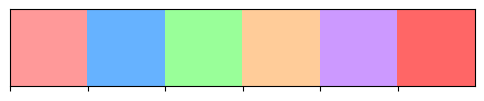

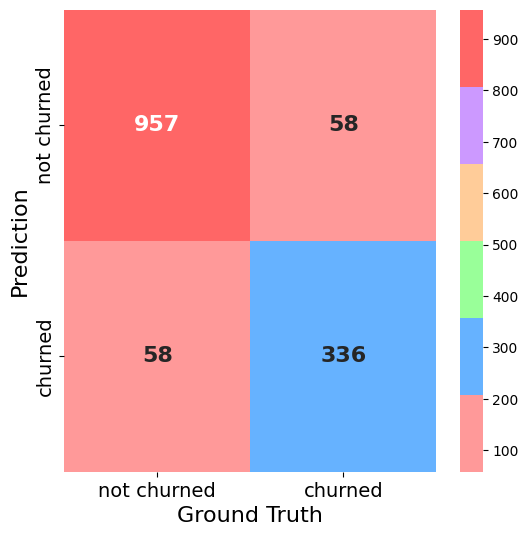

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#CC99FF', '#FF6666']

#hex codu verilen  renk listesini bir palet haline getirir
palette = sns.color_palette(colors)

sns.set_palette(palette)

# paleti görselleştirir. yani renk paletini ekrana bastık
sns.palplot(sns.color_palette())

_, ax = plt.subplots(figsize=(6,6))

ax = sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='d',
    cmap=colors,
    annot_kws={
        'size':16,
        'weight': 'bold'
    }
)

labels = ['not churned', 'churned']
ax.set_xticklabels(labels, fontsize=14)
ax.set_yticklabels(labels, fontsize=14)
ax.set_xlabel('Ground Truth', fontsize=16)
ax.set_ylabel('Prediction', fontsize=16)

In [ ]:
# bu veri seti için kaç komşu sayısı en iyi sonuç veriri saptayalım

max_k = 40 
f1_scores = list()
error_rate = list() # err_rates = 1 - accuracy_score

for k in range(1, max_k):
    knn = KNeighborsClassifier(
        n_neighbors=k,
        weights='distance',
        metric='euclidean',
        p=2
    )

    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1= f1_score(y_test, y_pred)
    f1_scores.append(
        (k, round(f1, 4))
    )

    error = 1- round(accuracy_score(y_test, y_pred), 4)
    error_rate.append(
        (k, error)
    )

f1_result_df = pd.DataFrame(
    data = f1_scores,
    columns=['K', 'F1 Score']
)

error_rate_df = pd.DataFrame(
    data = error_rate,
    columns=['K', 'Error Rate']
)

In [26]:
f1_result_df.sort_values(by='F1 Score', ascending=False).head()

,K,F1 Score
8,9,0.8593
7,8,0.8568
5,6,0.8557
9,10,0.8557
3,4,0.8535


In [27]:
error_rate_df.sort_values(by='Error Rate', ascending=False).head()

,K,Error Rate
0,1,0.0994
1,2,0.0994
21,22,0.0880
35,36,0.0880
33,34,0.0880


<Figure size 1920x1440 with 0 Axes>

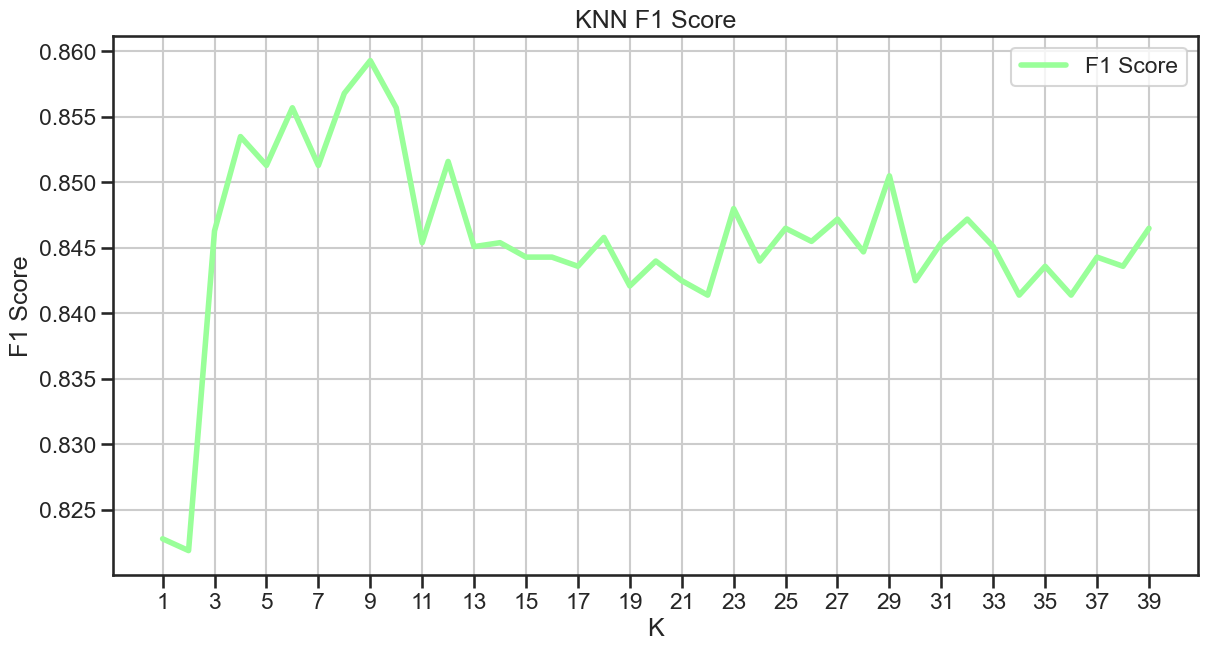

In [30]:
# 'talk' parametresi grafiklerini daha büyük ve sunumlara daha uygun olmasını sağlar. örneriğin yazı fontları, çizgi kalınlıkları 
sns.set_context('talk')

# ticks stili grafiğin kenarlarındaki eksen çizgilerini daha belirgin yapar
sns.set_style('ticks')

plt.figure(dpi=300)

ax=(f1_result_df
        .set_index('K')
        .plot(
            color=colors[2],
            figsize=(14, 7),
            linewidth = 4
        )
    )
ax.set(
    xlabel = 'K',
    ylabel = 'F1 Score'
)

ax.set_xticks(
    range(1, max_k, 2)
)

plt.title('KNN F1 Score')
plt.grid()
plt.show()

In [31]:
knn = KNeighborsClassifier(
        n_neighbors=9,
        weights='distance',
        metric='euclidean',
        p=2
    )

knn = knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print('Report')
print('===============================================================')
print(classification_report(y_test, y_pred))
print(f'Accuracy Score: {round(accuracy_score(y_test, y_pred),2)}')
print(f'F1 Score: {round(f1_score(y_test,y_pred),2)}')

Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1015
           1       0.87      0.85      0.86       394

    accuracy                           0.92      1409
   macro avg       0.90      0.90      0.90      1409
weighted avg       0.92      0.92      0.92      1409

Accuracy Score: 0.92
F1 Score: 0.86
